In [5]:
from nn_from_scratch.show_graph import draw_dot
import math

class Value:

    def __init__(self, data, _children = (), _op = '', name = '') -> None:
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._op = _op
        self.name = name
        # internal variables used for autograd graph construction
        self._backward = lambda: None

    def __repr__(self) -> str:
        return f"Value(data={self.data}, name={self.name})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(data=self.data+other.data, _children=(self, other), _op='+')
        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(data=self.data*other.data, _children=(self, other), _op='*')
        def _backward():
            self.grad += out.grad*other.value
            other.grad += out.grad*self.value
        out._backward = _backward
        return out
    
    def tanh(self,):
        x = self.value
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += 1 - t**2
        out._backward = _backward
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

Value(data=370, name=)


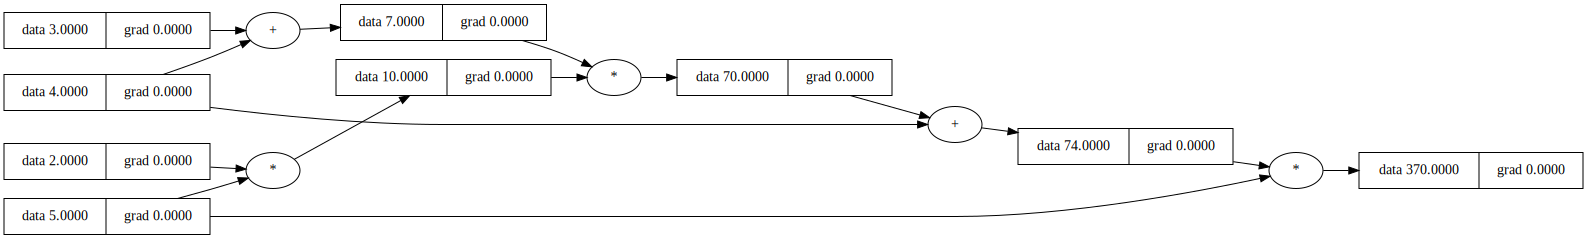

In [2]:

# Define your initial values
a = Value(4, name='a')
b = Value(3, name='b')
c = Value(2, name='c')
d = Value(5, name='d')

# Perform operations to create a more complex graph
e = a + b
f = c * d
g = e * f
h = g + a
i = h * d

# Print the final result and graph details
print(i)

# Draw the graph using draw_dot (assuming draw_dot works similarly to visualize computation graphs)
draw_dot(i)


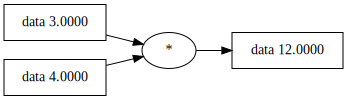

In [4]:
draw_dot(c)